Hunter Bennett | Kupffer Strains | Glass Lab | 27 April 2021

Goal of this notebook is to make figure formatted analyses of homer motif enrichment heatmaps for placement in figures. One outstanding issue is how we will select the TFs to be plotted. Manual curation will probably end up being the strategy.

In [51]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('ticks')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
from homer_preprocessing import read_annotated_peaks, import_homer_diffpeak, pull_comparisons_get_diff
from gene_expression_plots import survey_strain_amln_gene_exp, survey_strain_ccl4_gene_exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [34]:
dataDirectory = ''
workingDirectory = '/home/h1bennet/strains/results/06_Strains_Control_Cohort2_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Aggregate results - Homer

In [35]:
known_motif_pval_frame = pd.read_csv('./homer_known_motifs_log.txt', sep='\t', index_col=0)

In [36]:
known_motif_pval_frame.head()

,aj_intersection_distal_motifs,aj_intersection_motifs,aj_union_distal_motifs,aj_union_motifs,balbcj_intersection_distal_motifs,balbcj_intersection_motifs,balbcj_union_distal_motifs,balbcj_union_motifs,c57bl6j_intersection_distal_motifs,c57bl6j_intersection_motifs,c57bl6j_union_distal_motifs,c57bl6j_union_motifs
Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer,-0.1893,-0.2784,-0.06170,-0.11110,-17.66,-20.13,-26.69,-41.44,-9.216,-10.080,-28.54,-33.05
BATF(bZIP)/Th17-BATF-ChIP-Seq(GSE39756)/Homer,-0.3253,-0.4464,-0.04732,-0.08393,-15.32,-17.82,-20.39,-34.17,-11.150,-12.390,-34.03,-41.07
AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,-0.4899,-0.5361,-0.30370,-0.45420,-13.04,-14.75,-25.97,-39.52,-8.304,-8.379,-27.76,-33.46
Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,-0.3670,-0.4244,-0.02089,-0.05112,-15.19,-17.62,-19.54,-33.55,-8.266,-9.179,-29.93,-35.89
JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE36099)/Homer,-0.3219,-0.4474,-0.01978,-0.04437,-16.95,-20.13,-21.73,-36.98,-6.551,-7.375,-24.61,-31.20


# Plot known motif results

## Option for future: set custom motif list

In [70]:
motif_list = ['Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer',
              'MITF(bHLH)/MastCells-MITF-ChIP-Seq(GSE48085)/Homer',
              'IRF2(IRF)/Erythroblas-IRF2-ChIP-Seq(GSE36985)/Homer',
              'Mef2d(MADS)/Retina-Mef2d-ChIP-Seq(GSE61391)/Homer',
              'ISRE(IRF)/ThioMac-LPS-Expression(GSE23622)/Homer',
              'NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer',
              'Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer']

# we will make this plot using 'union' differential enhancer set
# we will also use all enhancers to raise our power.

tmp_frame = known_motif_pval_frame.loc[:, known_motif_pval_frame.columns.str.contains('union')]
tmp_frame = tmp_frame.loc[:, ~tmp_frame.columns.str.contains('distal')]
tmp_frame = tmp_frame.loc[motif_list, :]

#clean up rows for tmp frame
tmp_frame.index = tmp_frame.index.str.split('/').str[0].str.split('(').str[0].str.upper()

# convert to log10 p value
tmp_frame = np.log10(np.e**(tmp_frame))

# clean up columns
tmp_frame.columns = ['A/J', 'BALB/cJ', 'C57BL/6J']

In [71]:
mm_conv = 25.4

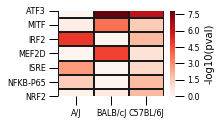

In [72]:
# set plot size
fig, ax = plt.subplots(figsize=(60/mm_conv, 40/mm_conv))

# convert to a log2 frame
tmp_frame = np.log10(np.e**(tmp_frame))

cm = sns.heatmap(
    -tmp_frame,
    cmap='Reds',
    linewidths=1,
    linecolor='k',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'})
    #square=True)

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_intersection_enhancers.pdf',
            bbox_inches='tight')

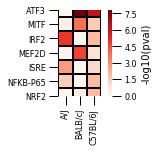

In [73]:
# set plot size
fig, ax = plt.subplots(figsize=(60/mm_conv, 40/mm_conv))

cm = sns.heatmap(
    -tmp_frame,
    cmap='Reds',
    linewidths=1,
    linecolor='black',
    # annot=True,
    cbar_kws={'label': '-log10(pval)'},
    square=True)

plt.savefig('./fancy_figures/homer_enrichedmotifs_custommotifs_intersection_enhancers_square.pdf',
            bbox_inches='tight')